# Outline for class and goals

The goal of most regression methods is to estimate a probabilistic distribution over a target variable (y) given a set of fixed training data (X).
More concisely, the goal of most regression techniques is to estimate $p(y|X)$, the probability of a target given a set of fixed data.

We will follow a series of steps that will help you understand regression models. Two  regression models will serve as an example: Linear regression (**LR**) and K-nearest neighbors (**KNN**) regression. We will explore the assumptions they make, how they make predictions, and how they learn from training data. 

The Bias-Variance tradeoff will be introduced and used to compare LR and KNN regression to one another.

# The Goal
The goal of this class is to give a brief tour of statistical methodology, and show how to approach and understand new statistical models. 

# Data

## Structure

We are given a dataset $\mathcal{D}$ that contains a target variable $y$ we are interested in predicting, and a set of $p$ covariates $X$ we can use to help predict our target $y$.
Our dataset $\mathcal{D}$ will have $N$ rows that are understood to be observations and $p+1$ columns, $p$ columns of covariates and the target variable $y$.

Our data $\mathcal{D}$ can be placed in a matrix
$$
\mathcal{D} = \left[
\begin{array}{ccccccc|c}
x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{1} \\
x_{21} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{2} \\
x_{31} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{3} \\
\vdots &\vdots  \vdots   & \vdots & \vdots & \vdots   & \vdots & \vdots \\ 
x_{N1} & x_{N2} & x_{N3} & x_{N4} & x_{N5} & \cdots   & x_{NP} & y_{N}\\
\end{array}\right]
$$
where observations are stacked on top of one another.

We can also remove the target variable $y$ and refer to the matrix of covariates ($X$) or just the vector of target variables $(Y)$
$$
X = \left[
\begin{array}{ccccccc}
x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
x_{21} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
x_{31} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
\vdots &\vdots  \vdots   & \vdots & \vdots & \vdots   & \vdots \\ 
x_{N1} & x_{N2} & x_{N3} & x_{N4} & x_{N5} & \cdots   & x_{NP} \\
\end{array}\right]
;Y = \left[
\begin{array}{ccccccc|c}
y_{1} \\
y_{2} \\
y_{3} \\
\vdots \\ 
y_{N}\\
\end{array}\right]
$$

The above is a common way S & ML literature defines a dataset and we will use these definitions throughout class.
Upcoming models will take as *input* $X$ and *output* a prediction of the target $y$.
Here is an example dataset you could encounter in practice.

## Example

As an example, we will use the [Boston Housing Market dataset](http://lib.stat.cmu.edu/datasets/boston).
The data includes $506$ different houses in the Boston area, attributes about the house and owners, and the house's median appraised value.

There are $13$ different covariates (our X data) available to predict housing price.
Our X dataset has $506$ observations and 13 columns, and a single column of $X$ represents a single covariate.

$$
X = \left[\begin{array}{ccccccc}
x_{1,1} & x_{1,2} &  \cdots   & x_{1,13} \\
x_{2,1} & x_{1,2} &  \cdots   & x_{1,13} \\
x_{3,1} & x_{1,2} &  \cdots   & x_{1,13} \\
\vdots &\vdots    &  \cdots   & \vdots \\ 
x_{506,1} &x_{506,2}   & \cdots   & x_{506,13} \\
\end{array}\right]
$$

In [108]:
import numpy as np
import sklearn.datasets # import package that contains the Boston House-price dataset.
import pandas as pd

from sklearn.datasets import load_boston
Xy = load_boston()


# X Data loaded into a dataframe
X = pd.DataFrame(Xy.data)
X.columns = Xy.feature_names
print(X.head())
print(X.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 13)


Our target variable
$y = \left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{506}
\end{array}\right]
$
will have $506$ observations. 

In [109]:
y = Xy.target
print(y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


And we can form $\mathcal{D}$ by appending our target variable $y$ to our dataset of covariates $X$.

In [110]:
D = X
D['target'] = Xy.target
print(D.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


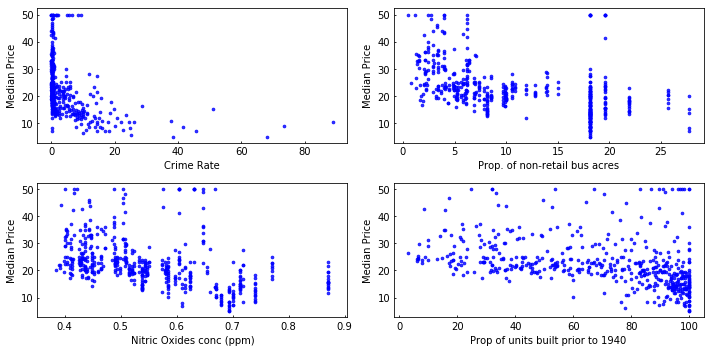

In [111]:
fig,axs = plt.subplots(2,2)

ax = axs[0,0]
ax.scatter(D.CRIM,D.target,color='b',alpha=0.80,s=7)
ax.set(xlabel='Crime Rate', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)

ax = axs[0,1]
ax.scatter(D.INDUS,D.target,color='b',alpha=0.80,s=7)
ax.set(xlabel='Prop. of non-retail bus acres', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)

ax = axs[1,0]
ax.scatter(D.NOX,D.target,color='b',alpha=0.80,s=7)
ax.set(xlabel='Nitric Oxides conc (ppm)', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)

ax = axs[1,1]
ax.scatter(D.AGE,D.target,color='b',alpha=0.80,s=7)
ax.set(xlabel='Prop of units built prior to 1940', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)

fig.set_size_inches(10,5)
fig.set_tight_layout(True)


-------
# Question for Self-Assessment (QSA)
## Are the relationships above linear, non-linear? What do we mean when we say linear?
-------

Linear and KNN regression will input $X$ data and output predictions of $y$.

## Linear Regression

### The model

Linear regression **(LR)** is a building-block for more advanced models and can take two different, but equivalent, forms: (i) model and (ii) probabilistic.

**(i) Model Form**

The model form of LR is
\begin{align}
y_{i} &= \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots + \beta_{p}x_{ip} + \epsilon_{i}\\
\epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}


We can also use the inner product to help define our model and write LR as
\begin{align}
y_{i} &= \beta_{0} + \beta'x_{i} + \epsilon_{i}\\
\epsilon &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}
where 
$$
\beta = \left[\begin{array}{c}
\beta_{1}\\
\beta_{2}\\
\vdots\\
\beta_{p}
\end{array}\right]; 
%
x_{i} = \left[\begin{array}{c}
x_{i1}\\
x_{i2}\\
\vdots\\
x_{ip}
\end{array}\right]
$$
and the inner product is
$$
\beta'x_{i} = \sum_{p=1}^{P} \beta_{p}x_{ip}
$$

**Probabilistic Form**

The probabilistic form for linear regression is 
\begin{align}
y_{i} | x_{i} &\sim \mathcal{N}\left[ \mu(x_{i}|\beta), \sigma^{2}\right]\\
\mu(x_{i}|\beta) &= \beta_{0} + \beta'x_{i} 
\end{align}
or 
\begin{align}
y_{i}| x_{i} &\sim \mathcal{N}\left(\beta_{0} + \beta'x_{i}, \sigma^{2}\right)\\
\end{align}

### Differences between model and probabilistic form

In model form, you emphasize how covariates ($x$s) relate to your target variable $y$.
The noise term is present but separate from the prediction.
An **advantage** of model form is that an audience can clearly understand the covariates used for prediction and how they relate to the target.
A **disadvantage** of model form is that the probability distribution over possible y values is harder to see.
Opposite of model form is probabilistic form.

Probabilistic form emphasizes the conditional probability distribution defined over possible target values (y-values).
Opposite of model form, an **advantage** of probabilistic form is the emphasis on probabilistic predictions.
A **disadvantage** of probabilistic form is that can be more difficult to communicate to non-quantitative audiences.

### Assumptions
LR assumes covariates linearly (**L**) relate to the target variable's expected value plus some noise $\epsilon$.
Observations in LR are assumed independent of one another (**I**).
The noise term $\epsilon$ is assumed to be distributed Normal (**N**) with equal variance (**E**) for different $x$ values.
These assumptions are often called the **LINE** assumptions.

---------
# Question for Self-Assessment (QSA)
## Is one form (model or probabilistic) better when communicating a model?
---------

### How to make a prediction

Given a vector $x^{*}$, a linear regression model assumes the best prediction is the expected value, or 

$$
\text{LR}(x^{*}) = \beta_{0} + \beta'x^{*}
$$

If we plot the predictions over an interval $x$, the predicted $y$s form a line.

### Example
As an example, we generated $50$ $(x,y)$ pairs of training data.
The true relationship between $x$ and $y$ is linear with a slope equal to $2$ and a Normally distributed noise term was added with variance $3$.

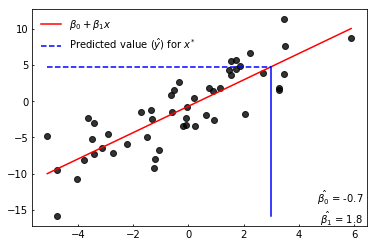

In [112]:
import matplotlib.pyplot as plt

Nsamples = 50

Xy = pd.DataFrame({"x":np.random.normal(0,3,Nsamples)})
Xy['y'] = 2*Xy.x + np.random.normal(0,3,Nsamples)

Xy = Xy.sort_values('x')
x,y = list(Xy.x),list(Xy.y)

fig,ax = plt.subplots()
ax.scatter(x,y,color='k',alpha=0.80)

b1,b0 = np.polyfit(x,y,1)

minx,maxx = min(x),max(x)
ax.plot([minx,maxx],[b0+b1*minx,b0+b1*maxx],'r-', label=r'$\beta_{0} + \beta_{1}x$')

ax.plot([3,3],[min(y), b0+b1*3],'b-')
ax.plot([min(x),3],[b0+b1*3, b0+b1*3],'b--'
        ,label = r'Predicted value $(\hat{y})$ for $x^{*}$')
ax.text(0.99,0.01,r"$\hat{\beta_{0}}$"+" = {:.1f}\n".format(b0)+r"$\hat{\beta_{1}}$ = "+"{:.1f}".format(b1)
        ,transform=ax.transAxes,ha="right")
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

From the training data our LR model estimates the intercept and slope.
If we receive a new point $x^{*} = 3$, our LR model predicts that our target $y$ value will be intercept $+$ slope $\times $ 3.0. 
The prediction is the expected value (on the line).

### Model fitting (Learning)

We computed parameters $\beta$ that were used to predict target ($y$) values given a set of covariates, but did not yet explain how to estimate these parameters.
One way to estimate $\beta$ parameters, called "fitting the model", is to minimize an objective function.

An objective function takes $X$ and $y$ as input and outputs a single number.
Small objective function values are a sign the model fits well and large numbers are a sign the model fit is poor.

A natural objective function for LR is to measure the distance between $y$ value predictions made by using $x$ data and the true $y$ values. 
The Sum Squares Error **(SSE)** takes the difference between a true y-value ($y_{i}$) and the predicted y-value ($\hat{y_{i}}$), squares this difference, and then sums over all observations in $\mathcal{D}$.

\begin{align}
    \text{SSE}(\beta|X,y) &= \sum_{i=1}^{N} \left( y_{i} - \hat{y_{i}}\right)^{2}\\
\end{align}

Our predictions from LR will be the inner product of $\beta$ parameters and xdata.
We can replace $\hat{y_{i}}$ above with our expected value prediction

\begin{align}
\text{SSE}(\beta|X,y) &= \sum_{i=1}^{N}\left[ y_{i} - \mu(x_{i}|\beta)\right]^{2} \\
                      &= \sum_{i=1}^{N} \left[ y_{i} - \left(\beta_{0} + \beta'x_{i}\right) \right]^{2} \\
\end{align}
The goal is to find specific values for $\beta_{0}$ and $\beta_{1}$ that minimize the SSE.


In [124]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#simulate data
X = {'x1':[]}
y = []

N = 300 # Number of observations (x,y) pairs

x1 = np.random.normal(0,2,N)

b0,b1,sigma2 = 1., -1, 2. 
y = b0 + b1*x1 + np.random.normal(0,sigma2,N)


def LRandSSE(slopeB1,x1,y):
    #plot of x-data versus y-data
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    fig,axs = plt.subplots(1,2)

    ax = axs[0]
    ax.scatter(x1,y,color='k',alpha=0.25,label='(x,y) data')

    b1,b0 = np.polyfit(x1,y,1)

    minx,maxx = min(x1),max(x1)
    ax.plot([minx,maxx],  [b0+b1*minx, b0+b1*maxx], 'r-')
    ax.plot([minx,maxx],  [b0+slopeB1*minx, b0+slopeB1*maxx], 'g--')

    ax.legend(frameon=False)
    ax.set(xlabel=r'$x$',ylabel='y')
    ax.tick_params(direction='in',size=2.)

    ax = axs[1]
    def SSE(b1s):
        return [sum( (y - (b0+b1*x1))**2) for b1 in b1s]

    b1s = np.linspace(-3,3,20)
    ax.plot(b1s,SSE(b1s))
    ax.scatter(b1,SSE([b1]),color='r')

    ax.scatter(slopeB1,SSE([slopeB1]),color='g')
    ax.set(ylabel='Sum Squares Error (SSE)', xlabel =r'$\beta_{1} (Slope)$')
    ax.tick_params(direction='in',size=2.)

    fig.set_tight_layout(True)
    fig.set_size_inches(189/25.4,189/(2*25.4))

LRandSSEInt = lambda slopeB1: LRandSSE(slopeB1,x1,y)
interact(LRandSSEInt, slopeB1=widgets.FloatSlider(min=-3., max=3., step=.1, value=-0.70))

interactive(children=(FloatSlider(value=-0.7, description='slopeB1', max=3.0, min=-3.0), Output()), _dom_class…

<function __main__.<lambda>(slopeB1)>

---------
# Question for Self-Assessment (QSA)
## Does the SSE as a function of beta look like a familar shape? Does that say anything about a way to find the "best" beta?
---------

### Application to Boston Housing Market
We will fit a linear regression to the Boston housing market dataset.
The variables: Crime, Proportion of nearby non-retail business, Nitric Oxide Concentration, and Age of the home will be used to predict the median price of homes.

Our first task is to fit the model

In [114]:
from sklearn.linear_model import LinearRegression as LR

Xdata = D.loc[:,['CRIM','INDUS','NOX','AGE']]
y = D.target

LinReg = LR().fit(Xdata,y)
betas = LinReg.coef_
print('Betas')
print(betas)

print('Intercept (Beta0)')
intercept = LinReg.intercept_
print(intercept)

Betas
[-0.23192658 -0.43077784 -3.82553405 -0.01895099]
Intercept (Beta0)
31.58992306413215


Our linear regression returns an intercept, and beta parameters corresponding to the $X$data we entered in our model.
We can make predictions over the range of Crime, Proportion of non-retail business acres, and Nitric Oxide Concentrations, and Age of the home. 
We will make predictions for different values of our covariate of interest and assume a fixed average value for our remaining covariates. 
For example, we will make predictions for **Crime** rate from the following model

$$
\hat{y} = \beta_{0} + \beta_{1} \text{Crime} + \beta_{2} \bar{\text{Indus}}+ \beta_{3} \bar{\text{NOX}}+ \beta_{4} \bar{\text{Age}}
$$

where the "bar" over a variable stand for the average.
The prediction is then a function of only Crime.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


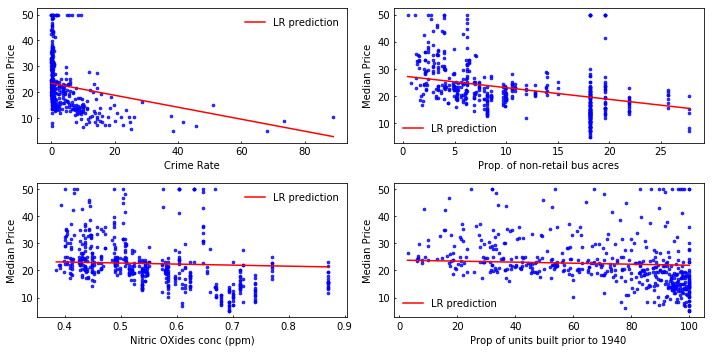

In [115]:
Xdata_averages = D.mean(0) # Find averages for each X variable 

fig,axs = plt.subplots(2,2)

#----------------------------------------------------------------------
ax = axs[0,0]
ax.scatter(D.CRIM,D.target,color='b',alpha=0.80,s=7,label='_none_')

minX = min(D.CRIM)
maxX = max(D.CRIM)
dom = [minX,maxX]

ax.plot(dom
       ,[intercept + betas[0]*x 
         + betas[1]*Xdata_averages.INDUS + betas[2]*Xdata_averages.NOX 
         + betas[3]*Xdata_averages.AGE for x in dom ] 
       ,'r-',label='LR prediction')

ax.set(xlabel='Crime Rate', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[0,1]
ax.scatter(D.INDUS,D.target,color='b',alpha=0.80,s=7,label='_none_')

minX = min(D.INDUS)
maxX = max(D.INDUS)
dom = [minX,maxX]

ax.plot(dom
       ,[intercept + betas[0]*Xdata_averages.CRIM 
         + betas[1]*x + betas[2]*Xdata_averages.NOX 
         + betas[3]*Xdata_averages.AGE for x in dom ] 
       ,'r-', label='LR prediction')

ax.set(xlabel='Prop. of non-retail bus acres', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[1,0]
ax.scatter(D.NOX,D.target,color='b',alpha=0.80,s=7,label='_none_')

minX = min(D.NOX)
maxX = max(D.NOX)
dom = [minX,maxX]

ax.plot(dom
       ,[intercept + betas[0]*Xdata_averages.CRIM 
         + betas[1]*Xdata_averages.INDUS + betas[2]*x 
         + betas[3]*Xdata_averages.AGE for x in dom ] 
       ,'r-',label='LR prediction')

ax.set(xlabel='Nitric OXides conc (ppm)', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[1,1]
ax.scatter(D.AGE,D.target,color='b',alpha=0.80,s=7,label='_none_')

minX = min(D.AGE)
maxX = max(D.AGE)
dom = [minX,maxX]

ax.plot(dom
       ,[intercept + betas[0]*Xdata_averages.CRIM 
         + betas[1]*Xdata_averages.INDUS + betas[2]*Xdata_averages.NOX
         + betas[3]*x for x in dom ] 
       ,'r-',label='LR prediction')


ax.set(xlabel='Prop of units built prior to 1940', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)
#----------------------------------------------------------------------

fig.set_size_inches(10,5)
fig.set_tight_layout(True)

## KNN

### The model

The K-nearest neighbors (**KNN**) model makes a prediction of $y$ given $x$\* by finding the top K closest (x,y) training examples and averaging the $y$ values.
KNN model takes a different approach than LR to predicting a target $y$.
While the LR model assumes $y$ and $x$ are linearly related, the KNN model assumes x-data close to our target's x-data have y-data close to our target's y value.

The KNN model needs a prespecified K closest training examples to average and a definition of "close".
To define close we use a distance function.
A distance function takes in two $x$ vectors, outputs a real number, and must satisfy 3 conditions: (i) the distance function must be symmetric, (ii) the distance between the same two training examples is zero, and (iii) the distance function must satisfy the triangle inequality.

**Three conditions for a distance function**
\begin{align}
d(a,b) &= d(b,a)\\
d(a,a) &= 0 \\
d(a,b) + d(b,c) &\le d(a,c)\\
\end{align}

A common way to define the distance between two points is Euclidean distance and defined as 

$$
  d_{\text{Euclidean}}(a,b) = \left[ \sum_{p=1}^{P} \left(a_{p} - b_{p} \right)^{2} \right]^{1/2}
$$

where $a$ and $b$ are vectors of length $P$.
In two dimensions the euclidean distance reduces to the straight-line distance between points $a=(a_{1},a_{2})$ and $b = (b_{1},b_{2})$.
Many different distance metrics have been proposed and affect the predictions KNN models make.

-------
# Question for Self-Assessment (QSA)
## What assumptions is KNN missing compare to LR?
## What different attributes impact a KNN model?
-------

### How to make a prediction
The KNN models makes a prediction by averaging the K nearest neighbors,

$$
\text{KNN}(x^{*}) =  \frac{\sum_{i \in N(x^{*})} y_{i}}{|N(x^{*})|}
$$

where $N(x^{*})$ are the $K$ nearest neighbor indices from the training data. 
The distance function and the number of neighbors defines the type of relationships a KNN model can make.
KNN models are capable of modeling highly non-linear relationships between covariates $X$ and target $y$. 

-------
# Question for Self-Assessment (QSA)
## Why would KNN assume the average is a good prediction?
------

### Example
As an example, we plotted a sinusoidal relationship between $x$ and $y$, and fit two different KNN models: one making a prediction using the single nearest neighbor and a second model using  the closest $7$ neighbors. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


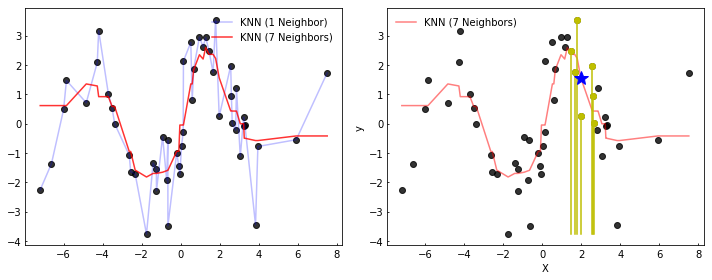

In [116]:
from sklearn import neighbors

Nsamples = 50

Xy = pd.DataFrame({"x":np.random.normal(0,3,Nsamples)})
Xy['y'] = 2*np.sin(Xy.x) + np.random.normal(0,1,Nsamples)

Xy = Xy.sort_values('x')
x,y = np.array(Xy.x).reshape(-1,1),np.array(Xy.y).reshape(-1,1)

knn_1 = neighbors.KNeighborsRegressor(n_neighbors=1)
predictions_1 = knn_1.fit(x, y).predict(x)
    
knn_7 = neighbors.KNeighborsRegressor(n_neighbors=7)
predictions_7 = knn_7.fit(x, y).predict(x)

fig,axs = plt.subplots(1,2)

ax = axs[0]
ax.scatter(x,y, color='k',alpha=0.80)
ax.plot(x,predictions_1,'b-' ,alpha=0.25 ,label = 'KNN (1 Neighbor)')
ax.plot(x,predictions_7,'r-',alpha=0.80 ,label = 'KNN (7 Neighbors)')

ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

ax = axs[1]
ax.scatter(x,y, color='k',alpha=0.80)
ax.plot(x,predictions_7,'r-',alpha=0.50 ,label = 'KNN (7 Neighbors)')

KNN = knn_7.fit(x, y)

predictedat2 = KNN.predict(np.array([2.]).reshape(-1,1))
predictedat2 = float(predictedat2[0])

distances, indices = KNN.kneighbors(np.array([2.]).reshape(-1,1))

nearestTrainingExamples = Xy.iloc[indices[0],:]
ax.plot(nearestTrainingExamples.x,nearestTrainingExamples.y,'yo',label='_none_')

minx,maxx = min(x),max(x)
miny = min(y)

for i,(x,y) in nearestTrainingExamples.iterrows():
    ax.plot( [x,x], [miny,y] , 'y-', label='_none_')

ax.set(xlabel = 'X', ylabel = 'y')
ax.plot([2],[predictedat2], 'b*', ms=15 )

ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

fig.set_size_inches(10,4)
fig.set_tight_layout(True)

**(Left)** We generated $50$ observation from a training data set and fit two KNN regressions: the first KNN models used $1$ nearest neighbor (blue) and the second model used $7$ nearest neighbors to make predictions.
The KNN model with 1 nearest neighbor closely fits the training data, but is jumpy.
The model that uses $7$ nearest neighbors does not fit the training examples as close but appears to approximate a smoother function. **(Right)** The same training set is used to fit the same KNN model that uses $7$ nearest neighbors.If we receive a new point $x^{*} = 2$, then our prediction is the average of the K nearest neighbor's y values. We highlighted the $7$ nearest neighbors in yellow and the prediction as a blue star.


In [117]:
from sklearn import neighbors

Xdata = D.loc[:,['CRIM','INDUS','NOX','AGE']]
y = D.target

KNN = neighbors.KNeighborsRegressor(n_neighbors=10)
KNN.fit(Xdata,y)

Xdata_averages = D.mean(0) # Find averages for each X variable 
predictionData = {'CRIM'  : [Xdata_averages.CRIM]*100
                  ,'INDUS': [Xdata_averages.INDUS]*100
                  ,'NOX'  : [Xdata_averages.NOX]*100
                  ,'AGE'  : [Xdata_averages.AGE]*100}

# Predictions for CRIME
minCRIM,maxCRIM     = min(Xdata.CRIM),max(Xdata.CRIM)
crimePredictionData = predictionData.copy()
crimePredictionData['CRIM'] = np.linspace(minCRIM,maxCRIM,100)

predictionsForCRIME = KNN.predict( pd.DataFrame(crimePredictionData) )

# Predictions for Non-retail space
minINDUS,maxINDUS     = min(Xdata.INDUS),max(Xdata.INDUS)
INDUSPredictionData = predictionData.copy()
INDUSPredictionData['INDUS'] = np.linspace(minINDUS,maxINDUS,100)

predictionsForINDUS = KNN.predict( pd.DataFrame(INDUSPredictionData) )

# Predictions for NOX
minNOX,maxNOX     = min(Xdata.NOX),max(Xdata.NOX)
NOXPredictionData = predictionData.copy()
NOXPredictionData['NOX'] = np.linspace(minNOX,maxNOX,100)

predictionsForNOX = KNN.predict( pd.DataFrame(NOXPredictionData) )

# Predictions for AGE
minAGE,maxAGE     = min(Xdata.AGE),max(Xdata.AGE)
AGEPredictionData = predictionData.copy()
AGEPredictionData['AGE'] = np.linspace(minAGE,maxAGE,100)

predictionsForAGE = KNN.predict( pd.DataFrame(AGEPredictionData) )

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


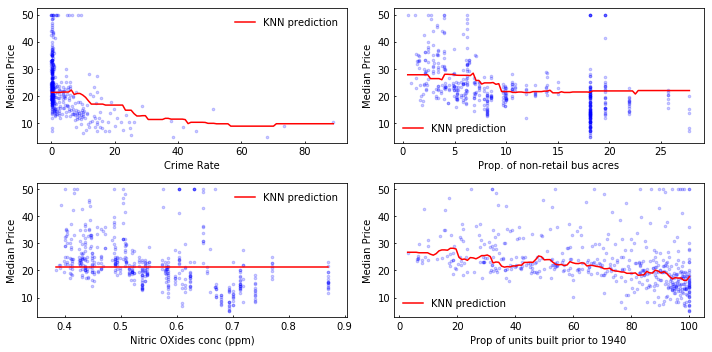

In [118]:
fig,axs = plt.subplots(2,2)

#----------------------------------------------------------------------
ax = axs[0,0]
ax.scatter(D.CRIM,D.target,color='b',alpha=0.20,s=7,label='_none_')

minX = min(D.CRIM)
maxX = max(D.CRIM)
dom = [minX,maxX]

ax.plot( crimePredictionData['CRIM']
        ,predictionsForCRIME,'r-',label='KNN prediction')

ax.set(xlabel='Crime Rate', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[0,1]
ax.scatter(D.INDUS,D.target,color='b',alpha=0.20,s=7,label='_none_')

minX = min(D.INDUS)
maxX = max(D.INDUS)
dom = [minX,maxX]

ax.plot( INDUSPredictionData['INDUS']
        ,predictionsForINDUS,'r-'
        ,label='KNN prediction'
)

ax.set(xlabel='Prop. of non-retail bus acres', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[1,0]
ax.scatter(D.NOX,D.target,color='b',alpha=0.20,s=7,label='_none_')

minX = min(D.NOX)
maxX = max(D.NOX)
dom = [minX,maxX]

ax.plot(NOXPredictionData['NOX']
        ,predictionsForNOX
        ,'r-'
        ,label='KNN prediction'
)

ax.set(xlabel='Nitric OXides conc (ppm)', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)

#----------------------------------------------------------------------
ax = axs[1,1]
ax.scatter(D.AGE,D.target,color='b',alpha=0.20,s=7,label='_none_')

minX = min(D.AGE)
maxX = max(D.AGE)
dom = [minX,maxX]

ax.plot(AGEPredictionData['AGE']
        ,predictionsForAGE
        ,'r-'
        ,label='KNN prediction'
)

ax.set(xlabel='Prop of units built prior to 1940', ylabel='Median Price')
ax.tick_params(direction='in',size=2.)
ax.legend(frameon=False)
#----------------------------------------------------------------------

fig.set_size_inches(10,5)
fig.set_tight_layout(True)

### Parameter learning

KNN regression is a non-parametric method that does not propose a functional form for the relationship between $X$ and $y$.
When we make a prediction for $x^{*}$ we find the K nearest neighbors and use our estimate of the average to predict.

## Comparing Lin Reg to KNN

The goal of Linear and KNN regression is to estimate $p(y|X)$, or the probability of a target variable given xdata related to the target.
But LR and KNN take different approaches.
LR assumes $p(y|X)$ follows a strict functional form $p(y|x) = \mathcal{N}\left(\beta_{0}+\beta'x ,\sigma^{2}\right)$.
KNN assumes we can directly estimate $p(y|x)$ by a set of points near $x$, $p(y|x) = \frac{1}{|N(x)|}\sum_{i \in N(x)} y_{i}$. 

When the relationship between $X$ and $y$ is linear, LR outperforms KNN, but KNN can predict better than LR when the link between $x$ and $y$ is non-linear.
KNN has a higher chance of overfitting data than LR.
This is because LR has a small fixed set of parameters related to the number of covariates used in prediction.
As covariates are entered into KNN regression, the number of dimensions increase, and for a fixed number of training examples, decreases data embedded in that space.
A larger space and more sparse data density pushes point farther away from one another and can make prediction more difficult.

Linear regression is a **Global Regression** method.
The predicted y value depends on our estimates of $\beta$, and these estimated $\beta$s depend on all the training data.
Our predictions depend on the entire set of training data.
KNN regression is a **Local Regression** method.
The predicted y value depends training data close to the point we want to predict, a subset of training data.


-------
# Question for Self-Assessment (QSA)
## What are the Pros/Cons to using LR versus KNN?
-------


## The Bias-variance tradeoff

The Bias-Variance (BV) tradeoff is one way to more generally discuss advantages and disadvantages of regression techniques.
We assume a true functional relationship between $x$ and $y$ that can generate training sets with noise.
A regression model can be fit to every training set and make predictions. 

The **Bias** is defined as the difference between the true relationship between $x$ and $y$, and the predictions averaged over an infinite number of training sets $P_{\infty}(x)$.

$$
    \delta(x) = \lim_{|N| \to \infty} \frac{1}{|N|} \left[ Y(x) - P_{\infty}(x) \right]
$$

where $N$ is the set of training sets indexed by $i$, $Y(x)$ is the true $y$ value at $x$, and 

$$
    P_{\infty}(x) = \lim_{|N| \to \infty} \frac{1}{|N|} \sum_{i \in N} P_{i}(x)
$$

The **Variance** at $x$ is defined as the average squared difference between individual training set predictions and $P_{\infty}(x)$.

$$
    \delta^{2}(x) = \lim_{|N| \to \infty} \frac{1}{|N|} \sum_{i \in N}[P_{i}(x) - P_{\infty}(x)]^{2}
$$

It is important to note that the bias depends on both the true functional relationship between $x$ and $y$ and our predictions, but the variance is only a function of our predictions.

Models that have **Low Bias** can, on average, very closely approximate the true relationship between $x$ and $y$. 
**High Bias** models cannot approximate the true link between $x$ and $y$.
**High Variance** models are sensitive to training data and make very different predictions when given different training sets.
Models with **Low Variance** make similar predictions when given different training sets.

All regression models have differing levels of bias and variance. 
In general, models that have **Low Bias** tend to have **High Variance** and vice-versa---this is called the Bias-Variance tradeoff. 

### Example

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


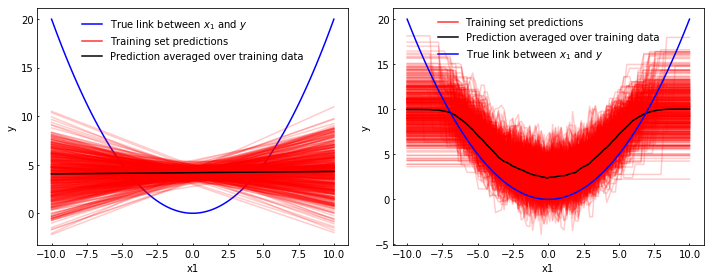

In [119]:
def generateTrainingSet(Nsamples = 10**2):
    Xy = pd.DataFrame({"x0":np.random.normal(0,3,Nsamples)
                      ,"x1":np.random.normal(0,3,Nsamples)
                      ,"x2":np.random.normal(0,3,Nsamples)
                      ,"x3":np.random.normal(0,3,Nsamples)})
    Xy['y'] = 2*np.sin(Xy.x0) + 0.2*Xy.x1**2 + abs(Xy.x2) + -1*Xy.x3 + 0*np.random.normal(0,0.01,Nsamples)
    return(Xy)

# Linear Regression 
def makeLRpredictions(trainingData,label=0):
    from sklearn.linear_model import LinearRegression
    Xy = trainingData
    reg = LinearRegression().fit(Xy.loc[:,['x1']], Xy.y)

    domain = np.linspace(-10,10,100).reshape(-1,1)
    LRpredictions = reg.predict(domain)

    if label==1:
        ax.plot(domain,LRpredictions,'r-',alpha=0.8,label='Training set predictions')
    else:
        ax.plot(domain,LRpredictions,'r-',alpha=0.2,label='_none_')
    return(LRpredictions)


def makeKNNpredictions(trainingData,label=0):
    Xy=trainingData
    KNN7 = neighbors.KNeighborsRegressor(n_neighbors=5)
    KNN7 = KNN7.fit(Xy.loc[:,['x1']], Xy.y)

    domain = np.linspace(-10,10,100).reshape(-1,1)
    KNNpredictions = KNN7.predict(domain)
    
    if label==1:
        ax.plot(domain,KNNpredictions,'r-',alpha=0.8,label='Training set predictions')
    else:
        ax.plot(domain,KNNpredictions,'r-',alpha=0.2,label='_none_')
    return(KNNpredictions)

    
#True relationship between x1 and y
fig,axs = plt.subplots(1,2)

domain = np.linspace(-10,10,100)

# Linear Regression
ax = axs[0]
ax.plot(domain, 0.2*domain**2,'b-',label=r'True link between $x_{1}$ and $y$')
for i in range(500):
    trainingData = generateTrainingSet()
    if i==0:
        avgPredictions = makeLRpredictions(trainingData,1)
    else:
        avgPredictions += makeLRpredictions(trainingData)
avgPredictions = avgPredictions/i
ax.plot(domain,avgPredictions,'k-', label = 'Prediction averaged over training data')
    
ax.set(xlabel = 'x1', ylabel = 'y')
ax.tick_params(direction='in',size=2.)

ax.legend(frameon=False)

ax = axs[1]
for i in range(500):
    trainingData = generateTrainingSet()
    if i==0:
        avgPredictions = makeKNNpredictions(trainingData,1)
    else:
        avgPredictions += makeKNNpredictions(trainingData)
avgPredictions = avgPredictions/i
ax.plot(domain,avgPredictions,'k-', label = 'Prediction averaged over training data')
ax.plot(domain, 0.2*domain**2,'b-',label=r'True link between $x_{1}$ and $y$')
    
ax.set(xlabel = 'x1', ylabel = 'y')
ax.tick_params(direction='in',size=2.)

ax.legend(frameon=False)

fig.set_tight_layout(True)
fig.set_size_inches(10,4)

Both plots are attempting to model the quadratic relationship between $x_{1}$ and $y$ plotted in blue.
For all $500$ training sets, we trained a linear regression model (left) and KNN regression (right).
Individual training set predictions are plotted in red and the average over all $500$ predictions, an estimate of $P_{\infty}$, is plotted in black.

We can see that for linear regression the bias is high (difference between black and blue lines) but the variance is low (red lines spread).
Opposite linear regression, KNN regression has smaller bias but larger variance.
This give and take between bias and variance is the Bias-Variance tradeoff.
